# Actividad de Aprendizaje: Regresión Polinomial Supervisada

**Nombre del estudiante:** [Completa tu nombre aquí]

**Objetivo:**
Desarrollar un análisis integral de regresión polinomial supervisada utilizando Python y librerías de Machine Learning. Se analizará un conjunto de datos real, aplicando técnicas de exploración, visualización, modelado y comparación de resultados con y sin escalado de características. El propósito es comprender el impacto de la ingeniería de variables y el preprocesamiento en la eficiencia y precisión de los modelos de regresión.

---

## Índice
1. Descripción y exploración del conjunto de datos
2. Visualización y análisis descriptivo
3. Regresión lineal simple
4. Regresión polinomial
5. Descenso de gradiente: comparación con y sin escalado
6. Modelos penalizados: Ridge y Lasso
7. Conclusiones

## 1. Descripción y exploración del conjunto de datos
En esta sección se importan las librerías fundamentales para el análisis de datos, la visualización y el modelado de regresión polinomial. Se configura el entorno para asegurar una presentación clara y profesional de los resultados.

In [41]:
# Importación de librerías principales para análisis de datos y Machine Learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Configuración de estilos y supresión de advertencias
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)
warnings.filterwarnings('ignore')
print("Librerías importadas correctamente.")

Librerías importadas correctamente.


Las librerías importadas permiten realizar un análisis completo de los datos, desde la manipulación y visualización hasta la construcción y evaluación de modelos de regresión.

In [42]:
# Carga del conjunto de datos desde archivo local
ruta = 'house_polinomial_regression_v3.0.csv'
df = pd.read_csv(ruta)

# Creación de la variable area_lote como producto de ancho y largo
df['area_lote'] = df['Lote_Ancho(m)'] * df['Lote_Largo(m)']

# Visualización de las primeras filas del DataFrame
df.head()

,Lote_Ancho(m),Lote_Largo(m),No. Habitaciones,No. Baños,Año_Construida,Capacidad_Garaje,Estrato,Precio_Casa,area_lote
0,16,17,2,1,1981,0,5,2.623829e+05,272
1,20,15,3,3,2016,1,6,9.852609e+05,300
2,16,13,1,2,2016,0,9,7.779774e+05,208
3,7,28,1,2,1977,1,8,2.296989e+05,196
4,20,36,2,1,1993,0,8,1.041741e+06,720


Se crea la variable `area_lote` para mejorar el alcance del modelo y se visualizan los primeros datos para conocer la estructura del dataset.

In [43]:
# Análisis exploratorio básico
print(df.info())
print(df.describe())
print('Valores nulos por columna:')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Lote_Ancho(m)     1000 non-null   int64  
 1   Lote_Largo(m)     1000 non-null   int64  
 2   No. Habitaciones  1000 non-null   int64  
 3   No. Baños         1000 non-null   int64  
 4   Año_Construida    1000 non-null   int64  
 5   Capacidad_Garaje  1000 non-null   int64  
 6   Estrato           1000 non-null   int64  
 7   Precio_Casa       1000 non-null   float64
 8   area_lote         1000 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 70.4 KB
None
       Lote_Ancho(m)  Lote_Largo(m)  No. Habitaciones    No. Baños  \
count    1000.000000    1000.000000       1000.000000  1000.000000   
mean       12.501000      24.990000          2.990000     1.973000   
std         4.694895       8.902536          1.427564     0.820332   
min         5.000000      10.000000       

## 2. Visualización y análisis descriptivo
Se realiza un análisis visual mediante histogramas y diagramas de caja para evaluar la distribución y detectar posibles valores atípicos.

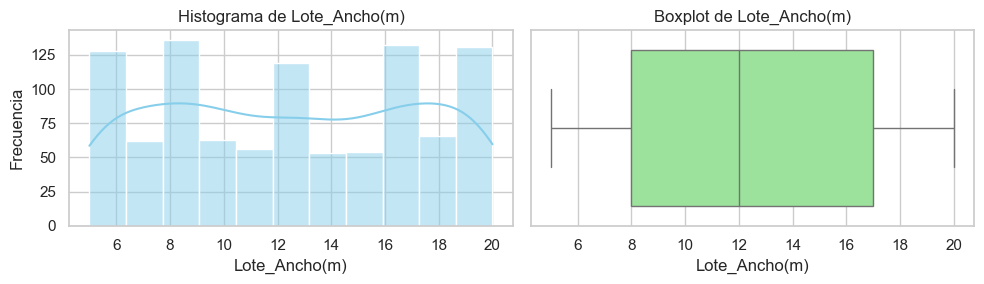

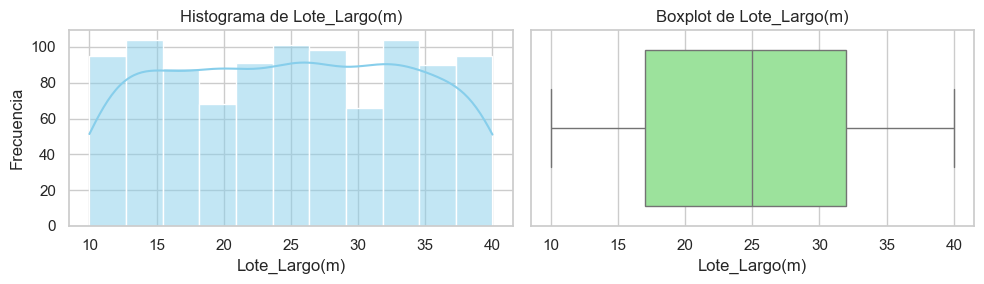

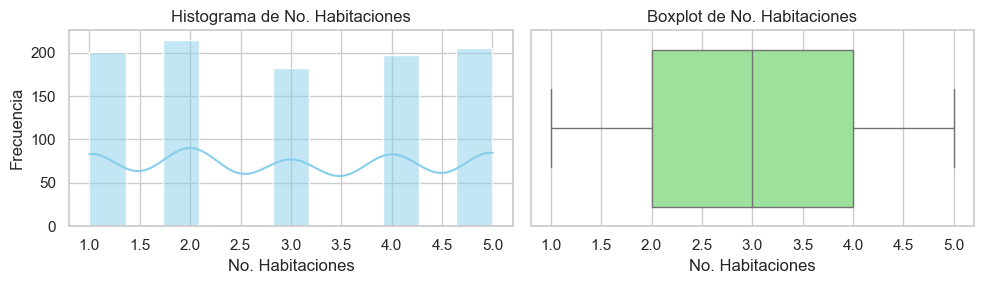

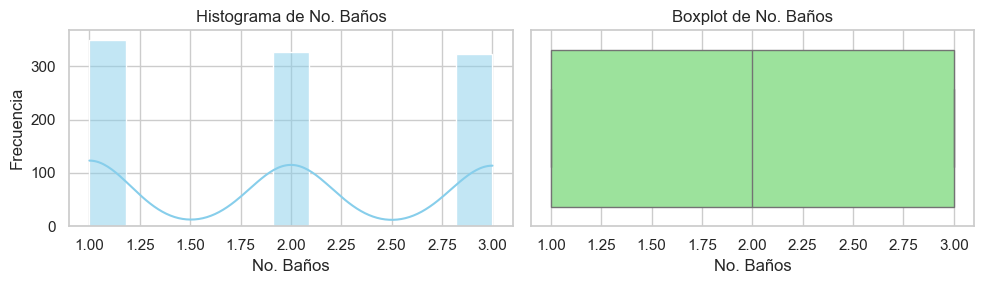

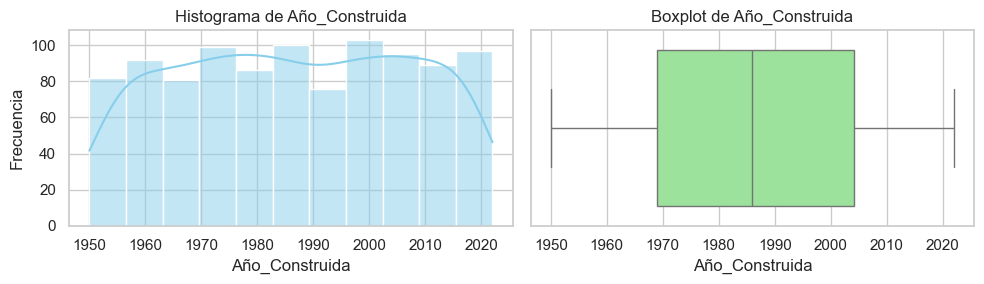

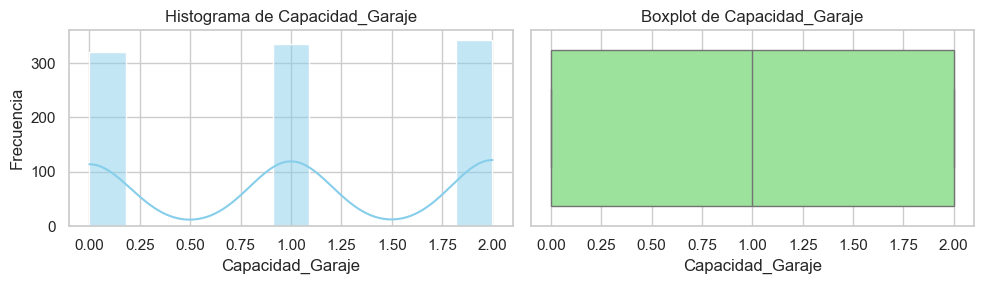

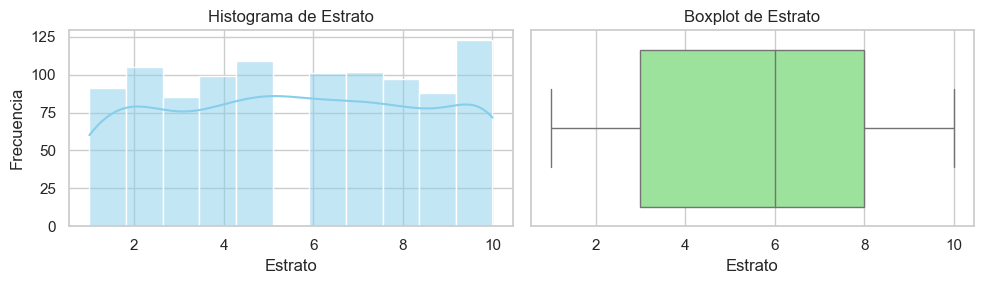

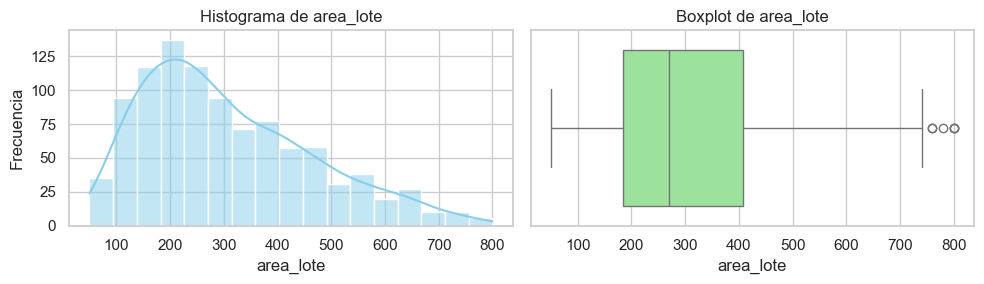

In [44]:
variables_numericas = [col for col in df.select_dtypes(include=np.number).columns if col != 'Precio_Casa']
for var in variables_numericas:
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    sns.histplot(df[var], kde=True, color='skyblue')
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[var], color='lightgreen')
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)
    plt.tight_layout()
    plt.show()

## 3. Regresión lineal simple
Se ajusta un modelo de regresión lineal para establecer una línea base de comparación.

MSE prueba: 64402942006.45
R2 prueba: 0.00


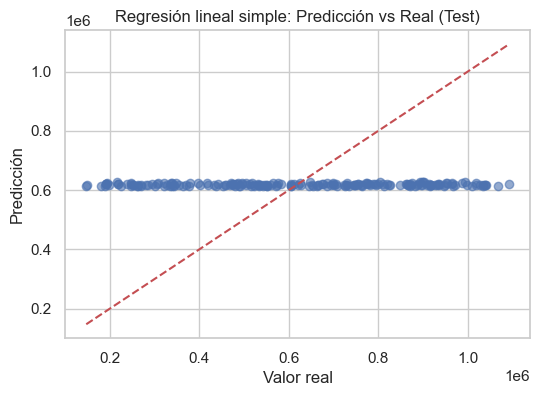

In [45]:
X = df[['area_lote']]
y = df['Precio_Casa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)
y_pred_test = modelo_lineal.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f'MSE prueba: {mse_test:.2f}')
print(f'R2 prueba: {r2_test:.2f}')
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Regresión lineal simple: Predicción vs Real (Test)')
plt.show()

## 4. Regresión polinomial
Se transforma la variable de entrada para capturar relaciones no lineales mediante características polinomiales.

MSE polinomial prueba: 64201029478.56
R2 polinomial prueba: 0.00


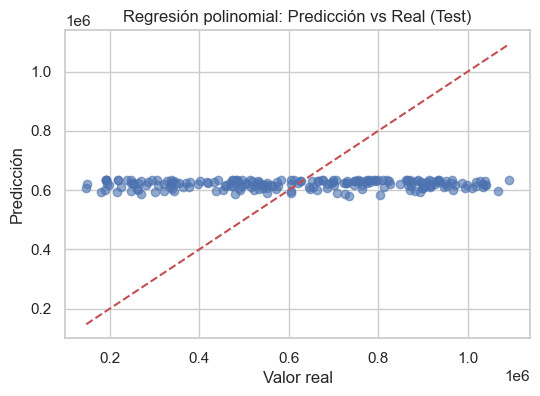

In [46]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
scaler_poly = StandardScaler()
X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
X_test_poly_scaled = scaler_poly.transform(X_test_poly)
modelo_poly = LinearRegression()
modelo_poly.fit(X_train_poly_scaled, y_train)
y_pred_poly_test = modelo_poly.predict(X_test_poly_scaled)
mse_poly_test = mean_squared_error(y_test, y_pred_poly_test)
r2_poly_test = r2_score(y_test, y_pred_poly_test)
print(f'MSE polinomial prueba: {mse_poly_test:.2f}')
print(f'R2 polinomial prueba: {r2_poly_test:.2f}')
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_poly_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Regresión polinomial: Predicción vs Real (Test)')
plt.show()

## 5. Descenso de gradiente: comparación con y sin escalado
Se implementa el descenso de gradiente manual para ajustar un modelo polinomial, primero sin aplicar escalado y luego aplicando escalado estándar a las variables.

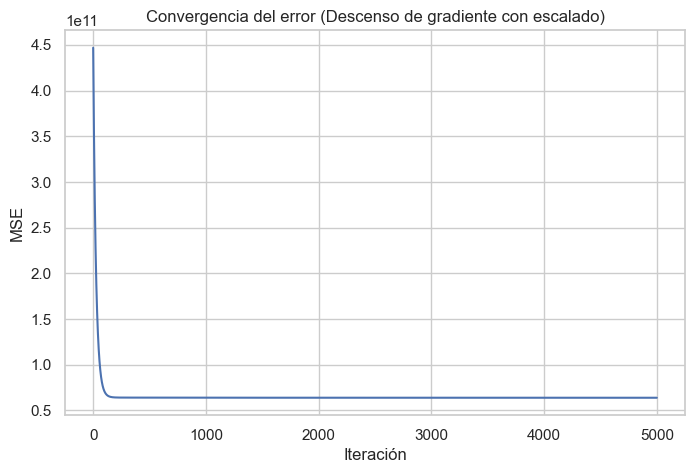

In [47]:
# Descenso de gradiente manual con escalado
m, n = X_train_poly_scaled.shape
w = np.zeros(n)
b = 0
alpha = 0.01
n_iter = 5000
losses = []
for i in range(n_iter):
    y_pred = X_train_poly_scaled @ w + b
    error = y_pred - y_train.values
    loss = (error ** 2).mean()
    losses.append(loss)
    grad_w = (2/m) * (X_train_poly_scaled.T @ error)
    grad_b = (2/m) * error.sum()
    w -= alpha * grad_w
    b -= alpha * grad_b
plt.plot(losses)
plt.title('Convergencia del error (Descenso de gradiente con escalado)')
plt.xlabel('Iteración')
plt.ylabel('MSE')
plt.show()

## 6. Modelos penalizados: Ridge y Lasso
Se implementan modelos de regresión polinomial con regularización Ridge y Lasso para comparar su desempeño frente al modelo polinomial estándar.

In [48]:
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)
ridge.fit(X_train_poly_scaled, y_train)
lasso.fit(X_train_poly_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_poly_scaled)
y_pred_lasso = lasso.predict(X_test_poly_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Ridge - MSE prueba: {mse_ridge:.2f}, R2 prueba: {r2_ridge:.2f}')
print(f'Lasso - MSE prueba: {mse_lasso:.2f}, R2 prueba: {r2_lasso:.2f}')

Ridge - MSE prueba: 64203753460.82, R2 prueba: 0.00
Lasso - MSE prueba: 64201063293.42, R2 prueba: 0.00


## 7. Conclusiones
- La ingeniería de variables y la transformación polinomial permiten capturar relaciones no lineales y mejorar el desempeño de los modelos de regresión.
- El escalado de características es esencial para la eficiencia y estabilidad de los algoritmos de optimización.
- La regularización con Ridge y Lasso ayuda a controlar el sobreajuste y mejorar la generalización del modelo.